`models.explainers` binary classification example (adult dataset)
-----

### Load packages

In [1]:
from transparentai.models import explainers
from transparentai.datasets import load_adult

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_adult()
X, Y = data.drop(columns='income'), data['income']

In [3]:
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})

Split train test

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Use `models.explainers.ModelExplainer` 

In [6]:
explainer = explainers.ModelExplainer(clf, X_train, model_type='tree')

In [7]:
explainer.explain_global_influence(X_train, nsamples=1000)

 98%|===================| 1969/2000 [00:44<00:00]        

{'age': 0.08590847478738237,
 'fnlwgt': 0.049290725285070114,
 'education-num': 0.07700143314713591,
 'capital-gain': 0.07019346243911335,
 'capital-loss': 0.013936660878327074,
 'hours-per-week': 0.05516654162727444}

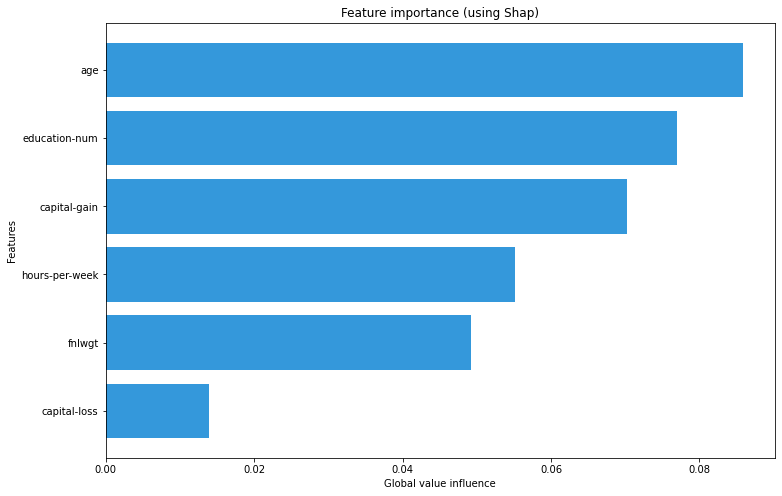

In [8]:
explainer.plot_global_explain()

In [9]:
explainer.explain_local_influence(X_valid.iloc[0])

{'age = 56': -0.042980556116090154,
 'fnlwgt = 33115': 0.00799944474012591,
 'education-num = 9': -0.11658277735987213,
 'capital-gain = 0': -0.024579441167297773,
 'capital-loss = 0': 0.0019166666857199743,
 'hours-per-week = 40': -0.02897333266446367}

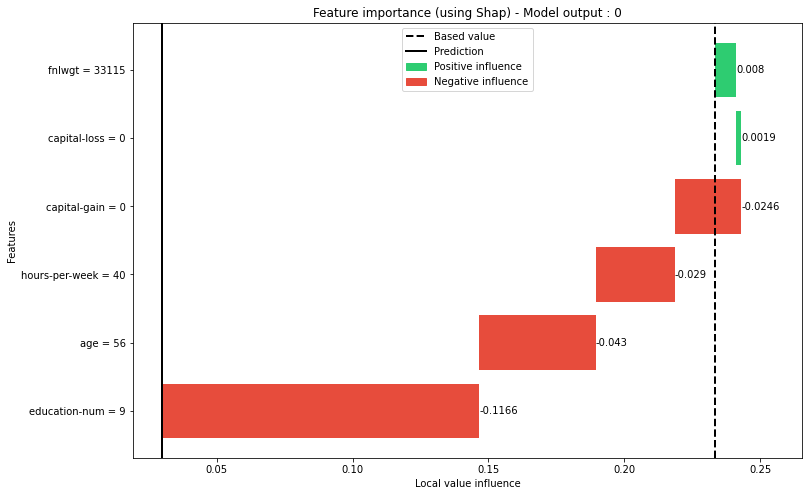

In [10]:
explainer.plot_local_explain(X_valid.iloc[0])

In [24]:
explainer.plot_local_explain_interact(X_valid.iloc[0])

interactive(children=(IntText(value=56, description='age', style=DescriptionStyle(description_width='initial')…

In [12]:
visible_features = ['age','hours-per-week']
explainer.plot_local_explain_interact(X_valid.iloc[0], visible_feat=visible_features)

interactive(children=(IntText(value=56, description='age', style=DescriptionStyle(description_width='initial')…